In [157]:
#Om Ganeshaye Namah

In [158]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import pickle
import re

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score  , confusion_matrix , f1_score
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifer
from sklearn.preprocessing import OneHotEncoder

In [159]:
###### Read the data ########

data = 'water_potability.csv'
data_all = pd.read_csv(data , encoding = 'latin-1') # There was an error while loading the CSV file
#UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa5 in position 6761: invalid start byte that's
#changed the default argument for parameter encoding from UTF-8 to latin-1



In [160]:
data_all.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8904555,20791.31898,7.300211873,368.516441,564.3086542,10.37978308,86.99097046,2.963135381,0
1,3.716080075,129.4229205,18630.05786,6.635245884,NaN,592.8853591,15.18001312,56.32907628,4.500656275,0
2,8.099124189,224.2362594,19909.54173,9.275883603,NaN,418.6062131,16.86863693,66.42009251,3.05593375,0
3,8.316765884,214.3733941,22018.41744,8.059332377,356.886136,363.2665162,18.4365245,100.3416744,4.628770537,0
4,9.092223456,181.1015092,17978.98634,6.546599974,310.135738,398.4108134,11.55827944,31.99799273,4.075075425,0


In [161]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   object 
 1   Hardness         3276 non-null   object 
 2   Solids           3276 non-null   object 
 3   Chloramines      3276 non-null   object 
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   object 
 6   Organic_carbon   3276 non-null   object 
 7   Trihalomethanes  3114 non-null   object 
 8   Turbidity        3276 non-null   object 
 9   Potability       3276 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 256.1+ KB


In [162]:
data_all.shape

(3276, 10)

In [163]:
##### SANITY CHECK ######

# Question - Data Sufficiency - This is the sample data given for project
# Question - Type of Problem - Classification
# Question - Identify target column - Potability
# Question - Target distribution. Identify presence of class imbalance - Yes 90% - 0 and 10% - 1


In [164]:
data_all['Potability'].value_counts()

0    2938
1     338
Name: Potability, dtype: int64

In [165]:
338/data_all.shape[0]

0.10317460317460317

In [166]:
########## Exploratory Data Analysis #######
## - Object to float
## - Null Value Treatment
## - Outliers Treatment
## - Skewness Treatment
## - Scaling

data_all.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8904555,20791.31898,7.300211873,368.516441,564.3086542,10.37978308,86.99097046,2.963135381,0
1,3.716080075,129.4229205,18630.05786,6.635245884,NaN,592.8853591,15.18001312,56.32907628,4.500656275,0
2,8.099124189,224.2362594,19909.54173,9.275883603,NaN,418.6062131,16.86863693,66.42009251,3.05593375,0
3,8.316765884,214.3733941,22018.41744,8.059332377,356.886136,363.2665162,18.4365245,100.3416744,4.628770537,0
4,9.092223456,181.1015092,17978.98634,6.546599974,310.135738,398.4108134,11.55827944,31.99799273,4.075075425,0


In [167]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   object 
 1   Hardness         3276 non-null   object 
 2   Solids           3276 non-null   object 
 3   Chloramines      3276 non-null   object 
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   object 
 6   Organic_carbon   3276 non-null   object 
 7   Trihalomethanes  3114 non-null   object 
 8   Turbidity        3276 non-null   object 
 9   Potability       3276 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 256.1+ KB


In [168]:
## Insight - there is some issue with Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes
##Turbidity these are columns reflect to be Objects however should be numeric
## Some features contains Null value as well - ph,Sulfate,Trihalomethanes

In [169]:
## Analysing the data for Null values
data_all.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [170]:
## percentage of data Missing
(data_all.isnull().sum()/data_all.shape[0])*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [171]:
###### PREPROCESSING ######

##### Resolve the issues that are converting numeric cols to object types
##### When there are string values in any one of the entry for the columns
##### Identify the non numeric values in the column --> Treatment

In [172]:
def non_nummeric(series1):
  non_numeric_elem = []
  for elem in series1:
    try:
      float(elem)
    except:
      non_numeric_elem.append(elem)
  return non_numeric_elem

In [173]:
data_column = ['ph','Hardness','Solids','Chloramines','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']

for col in data_column:
  non_numeric_elements = non_nummeric(data_all[col])
  print('************************************************')
  print(col)
  print(non_numeric_elements)


************************************************
ph
['7.-.160467231']
************************************************
Hardness
['214.496610%457156', "20''9.609618"]
************************************************
Solids
['18767.656--18134', '172.>66.59342', '2(9368.6741)8', ' ? 29,477.76 ', ' ? 24,967.32 ', ' ? 26,631.21 ', ' ? 24,539.71 ', ' ? 20,864.34 ', ' ? 16,879.52 ', ' ? 16,488.02 ', ' ? 11,351.86 ']
************************************************
Chloramines
['2.39798!499', '2.10269!09!91']
************************************************
Conductivity
['52,,,3.6712975', '323.794---624']
************************************************
Organic_carbon
[' ¥12.38 ', ' ¥11.12 ', ' ¥14.93 ', ' ¥13.35 ', ' ¥11.35 ', ' ¥16.05 ', ' ¥17.29 ', ' ¥9.80 ', ' ¥9.00 ', ' ¥14.08 ', ' ¥18.70 ', ' ¥15.77 ', ' ¥13.93 ', ' ¥9.71 ', ' ¥14.57 ', ' ¥16.25 ', ' ¥8.99 ', ' ¥15.61 ', ' ¥18.10 ', ' ¥11.53 ', ' ¥12.26 ', ' ¥9.83 ', ' ¥7.51 ', ' ¥13.86 ', ' ¥15.97 ', ' ¥9.35 ', ' ¥13.55 ', ' ¥11.87 ', '

In [174]:
data_all.loc[data_all['Solids']=='172.>66.59342','Solids'] = 17266.59342



In [175]:
'''input_list = ['18767.656--18134', '2(9368.6741)8', ' ? 29,477.76 ', ' ? 24,967.32 ', \
  ' ? 26,631.21 ', ' ? 24,539.71 ', ' ? 20,864.34 ', ' ? 16,879.52 ', ' ? 16,488.02 ', ' ? 11,351.86 ']

#Defining a function that will convert strings to float
def convert_to_float(s):

  clean_string = re.sub(r'[^\d.]','',s)
# Convert to float
  return float(clean_string)

String_to_float = [convert_to_float(item) for item in input_list]
print(String_to_float)  '''

"input_list = ['18767.656--18134', '2(9368.6741)8', ' ? 29,477.76 ', ' ? 24,967.32 ',   ' ? 26,631.21 ', ' ? 24,539.71 ', ' ? 20,864.34 ', ' ? 16,879.52 ', ' ? 16,488.02 ', ' ? 11,351.86 ']\n\n#Defining a function that will convert strings to float\ndef convert_to_float(s):\n\n  clean_string = re.sub(r'[^\\d.]','',s)\n# Convert to float\n  return float(clean_string)\n\nString_to_float = [convert_to_float(item) for item in input_list]\nprint(String_to_float)  "

In [176]:
#Defining a function that will convert strings to float
def convert_to_float(s):
  ''' This script defines a function convert_to_float that uses re.sub to remove anything that is not a digit
  or a dot, and then converts the cleaned string to a float. '''

  clean_string = ''

    # Attempt to clean the string
  try:
      clean_string = re.sub(r'[^\d.]', '', s)
  except Exception as e:
        print(f"Error cleaning string: {e}")

  return float(clean_string) if clean_string else None

#Apply the conversion function to the specified column
data_column = ['Hardness','Chloramines','Conductivity','Organic_carbon','Turbidity']
for col in data_column:
  data_all[col] = data_all[col].apply(lambda x: convert_to_float(x))
  print('******************************************************')
  print(col)
  print(data_all[col])

******************************************************
Hardness
0       204.890456
1       129.422921
2       224.236259
3       214.373394
4       181.101509
           ...    
3271    193.681736
3272    193.553212
3273    175.762646
3274    230.603758
3275    195.102299
Name: Hardness, Length: 3276, dtype: float64
******************************************************
Chloramines
0       7.300212
1       6.635246
2       9.275884
3       8.059332
4       6.546600
          ...   
3271    7.166639
3272    8.061362
3273    7.350233
3274    6.303357
3275    7.509306
Name: Chloramines, Length: 3276, dtype: float64
******************************************************
Conductivity
0       564.308654
1       592.885359
2       418.606213
3       363.266516
4       398.410813
           ...    
3271    526.424171
3272    392.449580
3273    432.044783
3274    402.883113
3275    327.459761
Name: Conductivity, Length: 3276, dtype: float64
******************************************************

In [177]:
data_all.loc[:,'ph']

0               NaN
1       3.716080075
2       8.099124189
3       8.316765884
4       9.092223456
           ...     
3271    4.668101687
3272    7.808856018
3273    9.419510316
3274    5.126762923
3275    7.874671358
Name: ph, Length: 3276, dtype: object

In [178]:

# Define a function to convert strings to float
def convert_to_float(s):
    if pd.isnull(s) or not isinstance(s, str):
        return None

    # Remove non-digit and non-dot characters
    cleaned_string = re.sub(r'[^\d.]', '', s)

    #print(f"Original: {s}, Cleaned: {cleaned_string}")

    # Convert to float
    try:
        return float(cleaned_string)
    except ValueError:
        return None
data_column = ['Solids','ph','Trihalomethanes']
for col in data_column:
# Apply the conversion function to each column in data_column

  data_all[col] = data_all[col].apply(lambda x: convert_to_float(x))
#data_all['Solids'] = data_all['Solids'].apply(lambda x: convert_to_float(x))

# Print the DataFrame with converted values
  print(data_all[col])
  print('**********************************')

0       20791.31898
1       18630.05786
2       19909.54173
3       22018.41744
4       17978.98634
           ...     
3271    47580.99160
3272    17329.80216
3273    33155.57822
3274    11983.86938
3275    17404.17706
Name: Solids, Length: 3276, dtype: float64
**********************************
0            NaN
1       3.716080
2       8.099124
3       8.316766
4       9.092223
          ...   
3271    4.668102
3272    7.808856
3273    9.419510
3274    5.126763
3275    7.874671
Name: ph, Length: 3276, dtype: float64
**********************************
0        86.990970
1        56.329076
2        66.420093
3       100.341674
4        31.997993
           ...    
3271     66.687695
3272           NaN
3273     69.845400
3274     77.488213
3275     78.698446
Name: Trihalomethanes, Length: 3276, dtype: float64
**********************************


In [179]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2784 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3275 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [180]:
#####Preprocessing for NUll Value #####################
print(data_all.isnull().sum())
data_all.isnull().sum()/(data_all.shape[0])*100

ph                 492
Hardness             0
Solids               1
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


ph                 15.018315
Hardness            0.000000
Solids              0.030525
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [181]:
data_all['ph'].describe()

count    2784.000000
mean        7.080766
std         1.594605
min         0.000000
25%         6.092665
50%         7.035894
75%         8.062251
max        14.000000
Name: ph, dtype: float64

In [182]:
data_all.skew()

ph                  0.025680
Hardness           -0.039342
Solids              0.621175
Chloramines        57.229356
Sulfate            -0.035947
Conductivity        0.264490
Organic_carbon     52.420198
Trihalomethanes    -0.083031
Turbidity          -0.007817
Potability          2.610286
dtype: float64

In [183]:
# we will treat the skewness for Chloramines and Organic_carbon

<ipython-input-184-32427fff2ab7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_all['Solids'])


<Axes: xlabel='Solids', ylabel='Density'>

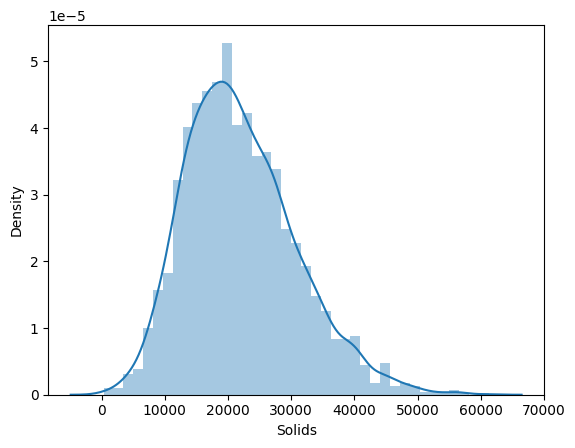

In [184]:
sns.distplot(data_all['Solids'])
## found little sckewness in the data will treat it going further after NAN value treatmnet

<ipython-input-185-16721688dff4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(data_all['Solids']))


<Axes: xlabel='Solids', ylabel='Density'>

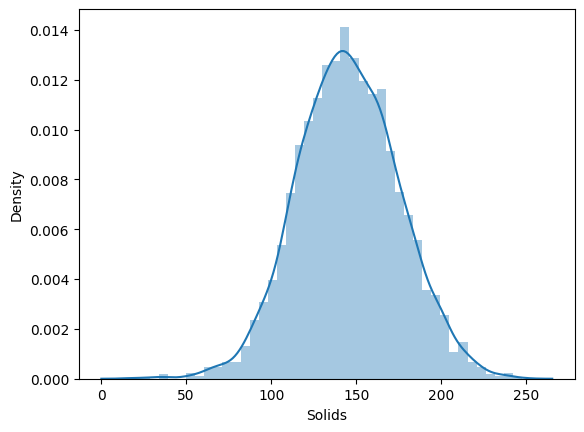

In [185]:
sns.distplot(np.sqrt(data_all['Solids']))

In [186]:
data_all['Sulfate'].describe() # skewness is negligiable

count    2495.000000
mean      333.775777
std        41.416840
min       129.000000
25%       307.699498
50%       333.073546
75%       359.950170
max       481.030642
Name: Sulfate, dtype: float64

In [187]:
## as the data is numeric continuous we can substitute the null value with the mean of the column

data_all.loc[data_all['Sulfate'].isna(),'Sulfate'] = np.mean(data_all['Sulfate'])

In [188]:
## as the data is numeric continuous we can substitute the null value with the mean of the column \
## data is normally distributed

data_all.loc[data_all['ph'].isna(),'ph'] = np.mean(data_all['ph'])

In [189]:
data_all['Solids'].describe()

count     3275.000000
mean     22015.542139
std       8769.517230
min        320.942611
25%      15665.106980
50%      20933.512750
75%      27334.162290
max      61227.196010
Name: Solids, dtype: float64

In [190]:
## as the data is numeric continuous we can substitute the null value with the mean of the column

data_all.loc[data_all['Solids'].isna(),'Solids'] = 22015.542139 # NAN replacinng by mean

In [191]:
data_all.loc[data_all['Trihalomethanes'].isna(),'Trihalomethanes'] = np.mean(data_all['Trihalomethanes'])

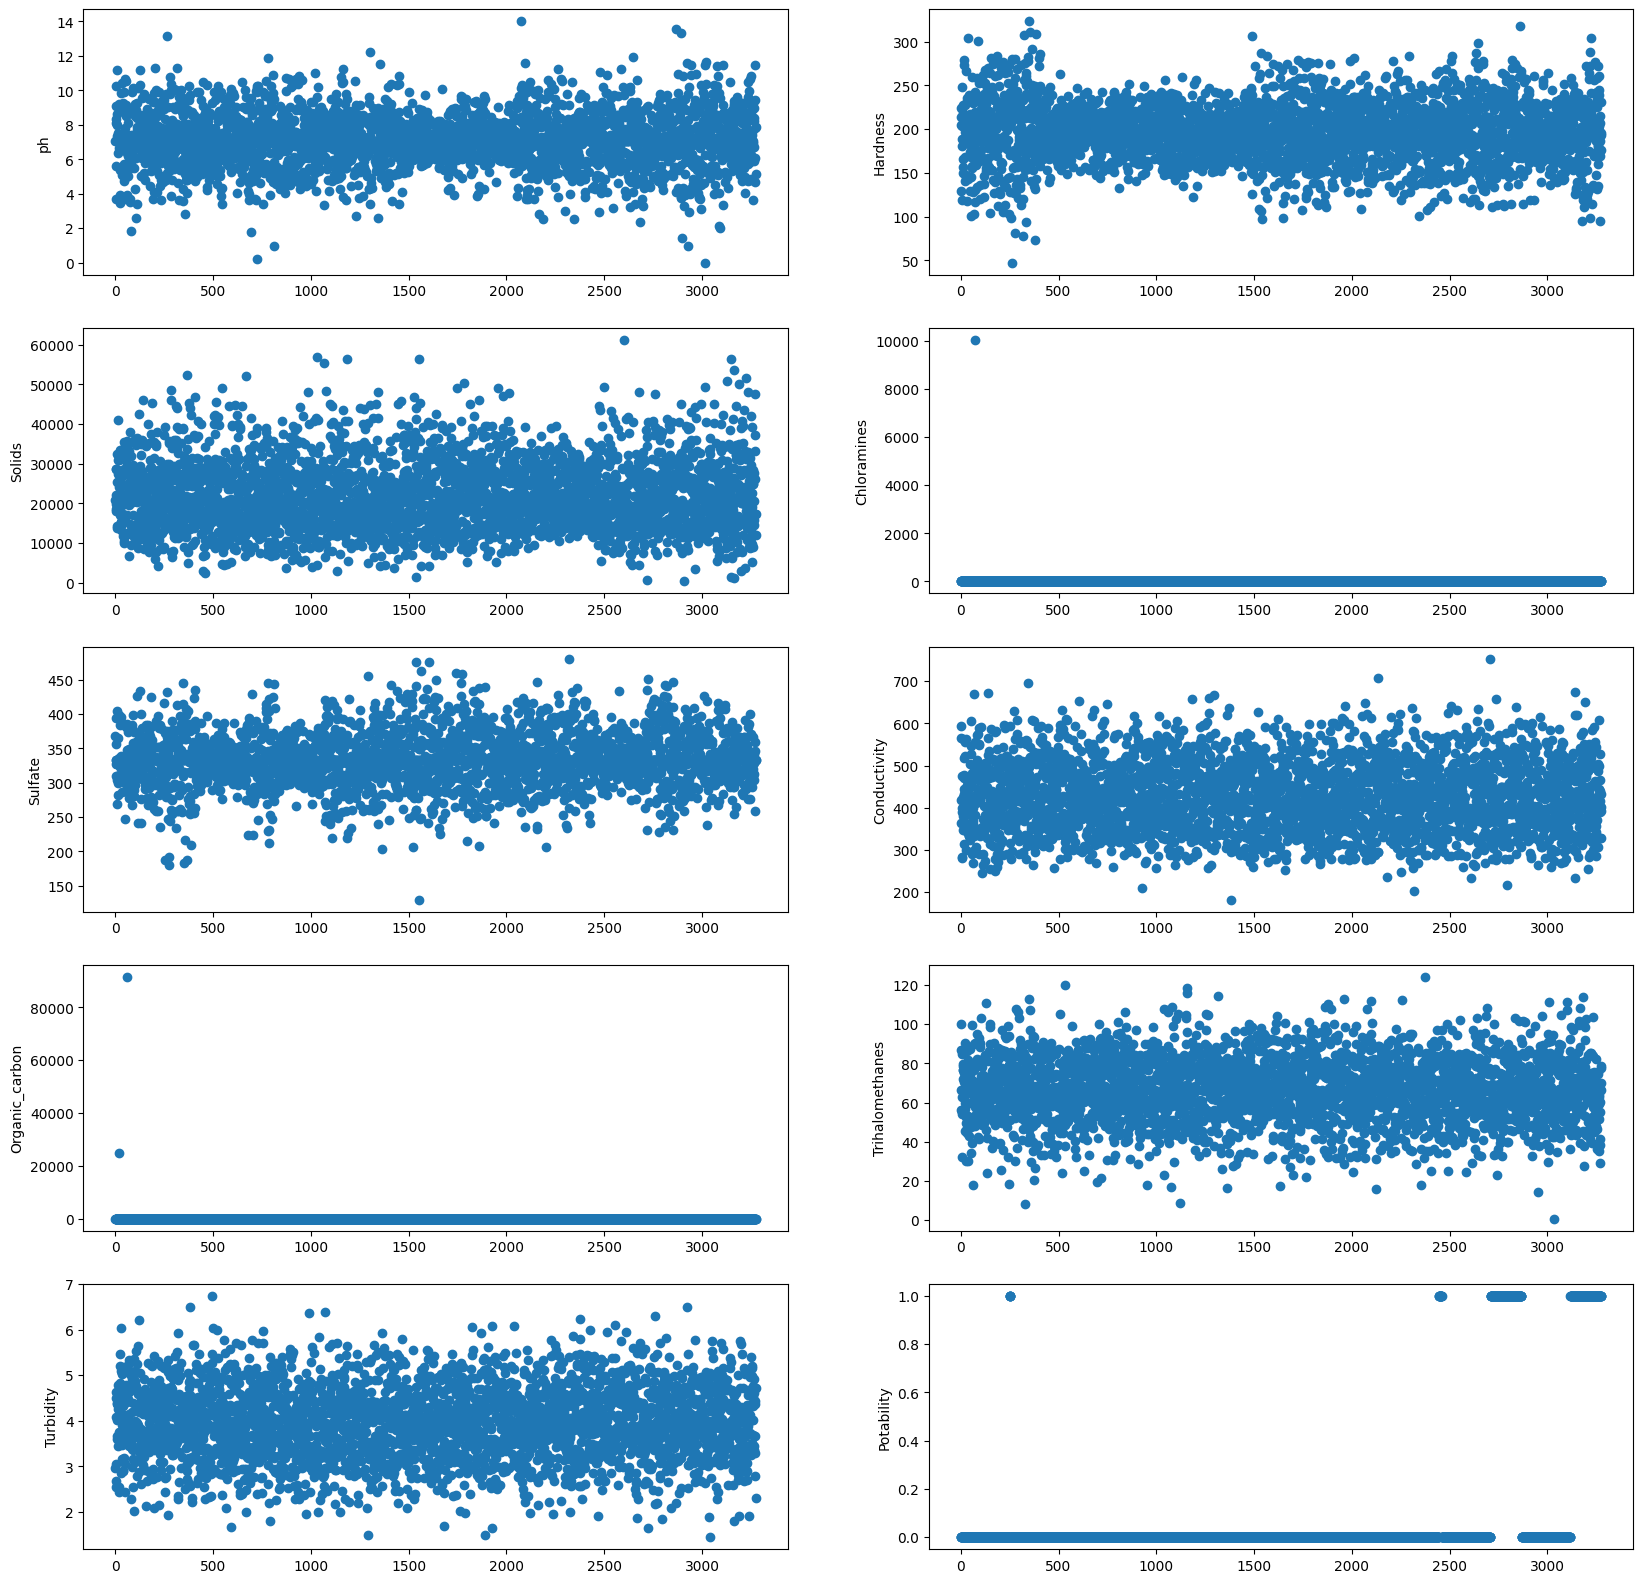

In [192]:
## Outlier Visualization , Analysis and Treatment

numeric_cols = data_all.select_dtypes(include = np.number) ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 5
plot_cols = 2

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

In [193]:
## Outlier Treatment ###


data_all['Organic_carbon'].describe()

count     3276.000000
mean        49.826372
std       1656.068227
min          2.200000
25%         12.066127
50%         14.220645
75%         16.560201
max      91456.654130
Name: Organic_carbon, dtype: float64

In [194]:
data_all.loc[data_all['Organic_carbon']>20000,'Organic_carbon'] = 16.560201 # replacing it with 75%

In [195]:
data_all['Chloramines'].describe()

count     3276.000000
mean        10.186989
std        175.418885
min          0.352000
25%          6.127421
50%          7.131070
75%          8.115458
max      10047.050500
Name: Chloramines, dtype: float64

In [196]:
data_all.loc[data_all['Chloramines']>2000,'Chloramines'] = 8.115458 # replacing it with 75%

In [197]:
data_all.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075840,-0.082048,-0.031966,0.014428,0.017191,0.039133,0.002969,-0.036220,-0.002382
Hardness,0.075840,1.000000,-0.047181,-0.030553,-0.092766,-0.023915,0.005022,-0.012690,-0.014449,-0.007452
Solids,-0.082048,-0.047181,1.000000,-0.069578,-0.149871,0.013927,0.010897,-0.008974,0.019729,0.021515
Chloramines,-0.031966,-0.030553,-0.069578,1.000000,0.023580,-0.020288,-0.013074,0.016388,0.002412,0.028562
Sulfate,0.014428,-0.092766,-0.149871,0.023580,1.000000,-0.014059,0.027696,-0.025605,-0.009790,0.018261
Conductivity,0.017191,-0.023915,0.013927,-0.020288,-0.014059,1.000000,0.019921,0.001255,0.005798,0.014311
Organic_carbon,0.039133,0.005022,0.010897,-0.013074,0.027696,0.019921,1.000000,-0.012992,-0.027165,-0.013627
Trihalomethanes,0.002969,-0.012690,-0.008974,0.016388,-0.025605,0.001255,-0.012992,1.000000,-0.021502,-0.020710
Turbidity,-0.036220,-0.014449,0.019729,0.002412,-0.009790,0.005798,-0.027165,-0.021502,1.000000,-0.016321
Potability,-0.002382,-0.007452,0.021515,0.028562,0.018261,0.014311,-0.013627,-0.020710,-0.016321,1.000000


In [198]:
data_all.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080766,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [199]:
x = data_all
x.to_csv('data_all.csv',index=None)

In [200]:
## Skewness Treatment ##

data_all.skew()

ph                 0.027854
Hardness          -0.039342
Solids             0.621270
Chloramines       -0.012638
Sulfate           -0.041184
Conductivity       0.264490
Organic_carbon     0.023798
Trihalomethanes   -0.085161
Turbidity         -0.007817
Potability         2.610286
dtype: float64

In [201]:
## Need to treat for skewness for Solids and Conductivity

<ipython-input-202-bc38baf7ffd7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_all['Solids'])


<Axes: xlabel='Solids', ylabel='Density'>

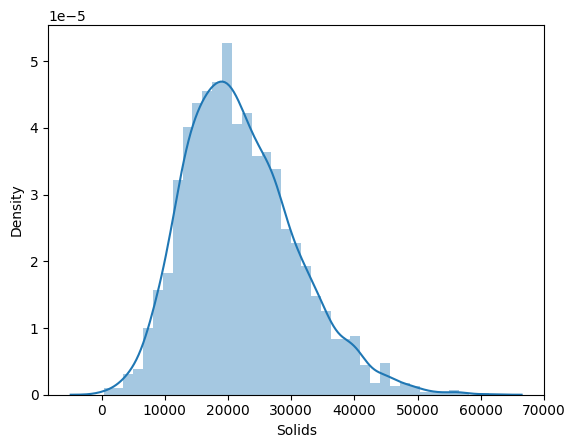

In [202]:
sns.distplot(data_all['Solids'])

<ipython-input-203-16721688dff4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(data_all['Solids']))


<Axes: xlabel='Solids', ylabel='Density'>

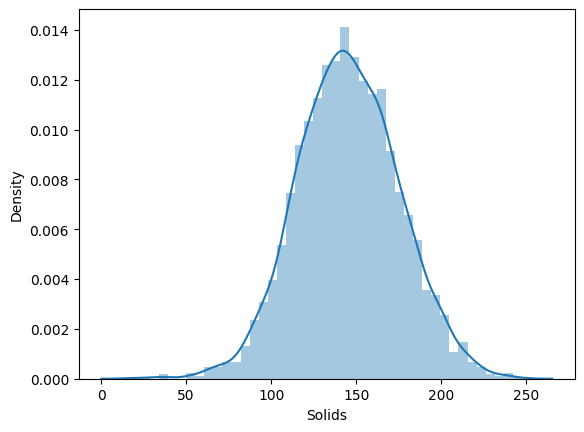

In [203]:
sns.distplot(np.sqrt(data_all['Solids']))

In [204]:
np.sqrt(data_all['Solids']).skew()

-0.015648610410264257

In [205]:
data_all['Solids'] = np.sqrt(data_all['Solids'])

<ipython-input-206-cc372c813c82>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_all['Conductivity'])


<Axes: xlabel='Conductivity', ylabel='Density'>

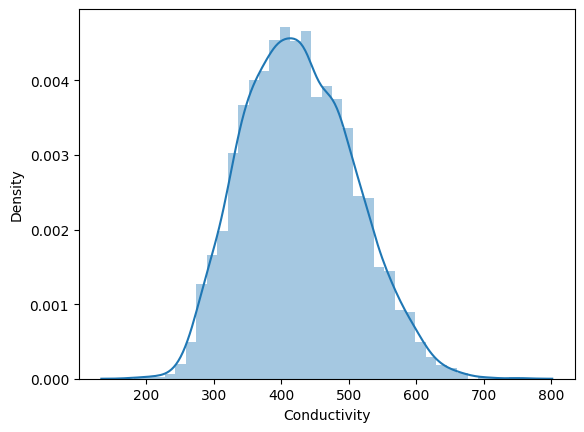

In [206]:
sns.distplot(data_all['Conductivity'])

<ipython-input-207-8a5bfdda60bc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(data_all['Conductivity']))


<Axes: xlabel='Conductivity', ylabel='Density'>

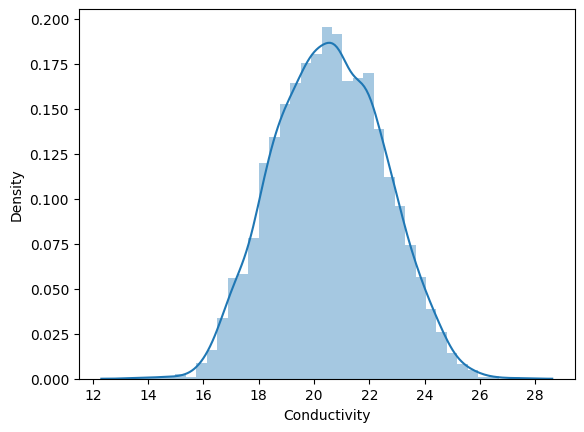

In [207]:
sns.distplot(np.sqrt(data_all['Conductivity']))

In [208]:
np.sqrt(data_all['Conductivity']).skew()

0.031893326594684294

In [209]:
data_all['Conductivity'] = np.sqrt(data_all['Conductivity'])

In [210]:
data_all.skew() ## Skewness has been treated for features

ph                 0.027854
Hardness          -0.039342
Solids            -0.015649
Chloramines       -0.012638
Sulfate           -0.041184
Conductivity       0.031893
Organic_carbon     0.023798
Trihalomethanes   -0.085161
Turbidity         -0.007817
Potability         2.610286
dtype: float64

In [211]:
## Scaling ##############
from sklearn.preprocessing import StandardScaler
column_names.remove('Potability')
sc = StandardScaler()
sc.fit(data_all[column_names])
data_all[column_names] = sc.transform(data_all[column_names])



In [212]:
data_all[column_names]


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.000000,0.259195,-0.038427,0.112203,0.961357,1.634956,-1.181775,1.306149,-1.286298
1,-2.289321,-2.036414,-0.296250,-0.307880,0.000000,1.938127,0.269709,-0.638480,0.684218
2,0.692888,0.847665,-0.141918,1.360309,0.000000,-0.046781,0.780312,0.001509,-1.167365
3,0.840970,0.547651,0.102006,0.591768,0.639519,-0.761422,1.254407,2.152874,0.848412
4,1.368589,-0.464429,-0.376819,-0.363881,-0.654177,-0.301767,-0.825423,-2.181599,0.138786
...,...,...,...,...,...,...,...,...,...
3271,-1.641569,-0.081758,2.437304,0.027820,0.724264,1.220943,-0.119026,0.018481,0.601124
3272,0.495390,-0.085667,-0.458621,0.593050,0.000000,-0.378263,1.697905,0.000000,-1.497627
3273,1.591274,-0.626829,1.230425,0.143804,0.000000,0.119498,-0.982421,0.218748,-0.856007
3274,-1.329497,1.041355,-1.201013,-0.517547,0.000000,-0.244753,-0.943149,0.703468,0.950797


In [213]:
feature_df = data_all.drop(['Potability'] , axis =1 )
target_df = data_all['Potability']

In [214]:
feature_df.shape , target_df.shape

((3276, 9), (3276,))

In [215]:
## Modelling #############
### dividing data into training testing #############

from sklearn.model_selection import train_test_split
feature_train,feature_val ,target_train, target_val = train_test_split(feature_df,target_df,\
test_size = 0.2 , random_state = 1200 , stratify= target_df)


In [216]:
## Due to stratefied sampling the percentage distribution of 1 and 0 from original data remain same after
## train-test split

feature_train.shape , feature_val.shape, target_train.shape ,target_val.shape

((2620, 9), (656, 9), (2620,), (656,))

In [217]:
target_train.value_counts()

0    2350
1     270
Name: Potability, dtype: int64

In [218]:
target_val.value_counts()

0    588
1     68
Name: Potability, dtype: int64

In [219]:
588/(588+68) , 2350/(2350+270)

(0.8963414634146342, 0.8969465648854962)

In [220]:
feature_train.reset_index(drop = True, inplace = True)
feature_val.reset_index(drop = True, inplace = True)
target_train.reset_index(drop = True, inplace = True)
target_val.reset_index(drop = True, inplace = True)


In [221]:
##- Round 1 Logistic Regression without GridSearchCV

LR_model = LogisticRegression(max_iter = 400,
                              random_state = 1200,
                              class_weight = {0:1,1:5.6})
LR_model.fit(feature_train,target_train)

#With {0:1,1:2} , {0:1,1:3} F1 Score 0, {0:1,1:4} F1 - 0.050, with {0:1,1:5} improved - 16.6%,
#with {0:1,1:6} - the performance has improved as per F1 score but now modeil has started predicting 1 more
# with {0:1,1:5.6} - the model is giving the max prediction to 19.9 with threshold 0.4


LogisticRegression(class_weight={0: 1, 1: 5.6}, max_iter=400, random_state=1200)

In [222]:
Prediction = pd.DataFrame(LR_model.predict_proba(feature_train))

In [223]:
Prediction['Thres'] = 0
Prediction.loc[Prediction[1]>=0.4,'Thres'] = 1

In [224]:
Prediction

,0,1,Thres
0,0.598533,0.401467,1
1,0.539417,0.460583,1
2,0.581096,0.418904,1
3,0.628528,0.371472,0
4,0.622451,0.377549,0
...,...,...,...
2615,0.590685,0.409315,1
2616,0.587480,0.412520,1
2617,0.587927,0.412073,1
2618,0.617152,0.382848,0


In [225]:
f1_score(y_true=target_train, y_pred = Prediction['Thres'])

0.19905956112852663

In [226]:
pd.DataFrame(confusion_matrix(y_true = target_train, y_pred = Prediction['Thres'] ) ,columns = ['Predict_0','Predict_1'] , index = ['Actual_0','Actual_1'])

,Predict_0,Predict_1
Actual_0,1471,879
Actual_1,143,127


In [227]:
prediction1 = pd.DataFrame(LR_model.predict_proba(feature_val))

In [228]:
prediction1['Thres']=0
prediction1.loc[prediction1[1]>=0.4,'Thres'] = 1

In [229]:
prediction1

,0,1,Thres
0,0.617107,0.382893,0
1,0.605948,0.394052,0
2,0.584378,0.415622,1
3,0.568681,0.431319,1
4,0.649499,0.350501,0
...,...,...,...
651,0.597140,0.402860,1
652,0.562671,0.437329,1
653,0.634534,0.365466,0
654,0.619518,0.380482,0


In [230]:
f1_score(y_true=target_val, y_pred = prediction1['Thres'])

0.16352201257861634

In [235]:
### K - Fold stratified sampling

train_rows = []
val_rows = []

from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=5) ## divide the entire data into 5 equal parts..each part is of 20% data

splits = kf.split(X=feature_df, y=target_df) ## actual splitting happens

for train_index, val_index in splits:
  train_rows.append(list(train_index))
  val_rows.append(list(val_index))

In [233]:
train_data = []
val_data = []

for train_index, val_index in zip(train_rows, val_rows):
    X_train, X_val = feature_df.iloc[train_index], feature_df.iloc[val_index]
    y_train, y_val = target_df.iloc[train_index], target_df.iloc[val_index]

    train_data.append((X_train, y_train))
    val_data.append((X_val, y_val))

In [78]:
first_fold_train_features, first_fold_train_target = train_data[0]
first_fold_val_features, first_fold_val_target = val_data[0]

Second_fold_train_features, Second_fold_train_target = train_data[1]
Second_fold_val_features, Second_fold_val_target = val_data[1]

third_fold_train_features, third_fold_train_target = train_data[2]
third_fold_val_features, third_fold_val_target = val_data[2]

fourth_fold_train_features, fourth_fold_train_target = train_data[3]
fourth_fold_val_features, fourth_fold_val_target = val_data[3]

fifth_fold_train_features, fifth_fold_train_target = train_data[4]
fift_fold_val_features, fifth_fold_val_target = val_data[4]




In [79]:
LR_model = LogisticRegression(max_iter = 400, random_state = 1200,
                              class_weight = {0:1,1:5.6})
LR_model.fit(first_fold_train_features,first_fold_train_target)

LogisticRegression(class_weight={0: 1, 1: 5.6}, max_iter=400, random_state=1200)

In [80]:
Prediction = pd.DataFrame(LR_model.predict_proba(first_fold_train_features))

In [81]:
Prediction['Thres'] = 0
Prediction.loc[Prediction[1]>=0.4,'Thres'] = 1

In [82]:
f1_score(y_true=first_fold_train_target, y_pred = Prediction['Thres'])

0.1892307692307692

In [83]:
prediction1 = pd.DataFrame(LR_model.predict_proba(first_fold_val_features))

In [84]:
prediction1['Thres'] = 0
prediction1.loc[prediction1[1]>=0.4,'Thres'] = 1

In [85]:
f1_score(y_true=first_fold_val_target, y_pred = prediction1['Thres'])

0.1411764705882353

In [86]:
LR_model = LogisticRegression(max_iter = 400, random_state = 1200,
                              class_weight = {0:1,1:5.6})
LR_model.fit(Second_fold_train_features,Second_fold_train_target)

LogisticRegression(class_weight={0: 1, 1: 5.6}, max_iter=400, random_state=1200)

In [87]:
prediction_train = pd.DataFrame(LR_model.predict_proba(Second_fold_train_features))
prediction_val = pd.DataFrame(LR_model.predict_proba(Second_fold_val_features))


In [88]:
prediction_train['Thres'] = 0
prediction_train.loc[prediction_train[1]>=0.4,'Thres'] = 1
prediction_val['Thres'] = 0
prediction_val.loc[prediction_val[1]>=0.4,'Thres'] = 1

In [89]:
print(f"f1 score for Second_fold_train {f1_score(y_true= Second_fold_train_target, y_pred = prediction_train['Thres'])}")
print(f"f1 score for Second_fold_val {f1_score(y_true= Second_fold_val_target, y_pred = prediction_val['Thres'])}")

f1 score for Second_fold_train 0.1914091936699322
f1 score for Second_fold_val 0.2111801242236025


In [90]:
LR_model = LogisticRegression(max_iter = 400, random_state = 1200,
                              class_weight = {0:1,1:5.6})
LR_model.fit(third_fold_train_features,third_fold_train_target)

LogisticRegression(class_weight={0: 1, 1: 5.6}, max_iter=400, random_state=1200)

In [91]:
prediction_train = pd.DataFrame(LR_model.predict_proba(third_fold_train_features))
prediction_val = pd.DataFrame(LR_model.predict_proba(third_fold_val_features))


In [92]:
prediction_train['Thres'] = 0
prediction_train.loc[prediction_train[1]>=0.4,'Thres'] = 1
prediction_val['Thres'] = 0
prediction_val.loc[prediction_val[1]>=0.4,'Thres'] = 1

In [93]:
print(f"f1 score for Third_fold_train {f1_score(y_true= third_fold_train_target, y_pred = prediction_train['Thres'])}")
print(f"f1 score for Third_fold_val {f1_score(y_true= third_fold_val_target, y_pred = prediction_val['Thres'])}")

f1 score for Third_fold_train 0.2021116138763198
f1 score for Third_fold_val 0.17419354838709677


In [94]:
LR_model = LogisticRegression(max_iter = 400, random_state = 1200,
                              class_weight = {0:1,1:5.6})
LR_model.fit(fourth_fold_train_features,fourth_fold_train_target)

LogisticRegression(class_weight={0: 1, 1: 5.6}, max_iter=400, random_state=1200)

In [95]:
prediction_train = pd.DataFrame(LR_model.predict_proba(fourth_fold_train_features))
prediction_val = pd.DataFrame(LR_model.predict_proba(fourth_fold_val_features))


In [96]:
prediction_train['Thres'] = 0
prediction_train.loc[prediction_train[1]>=0.4,'Thres'] = 1
prediction_val['Thres'] = 0
prediction_val.loc[prediction_val[1]>=0.4,'Thres'] = 1

In [97]:
print(f"f1 score for fourth_fold_train {f1_score(y_true= fourth_fold_train_target, y_pred = prediction_train['Thres'])}")
print(f"f1 score for fourth_fold_val {f1_score(y_true= fourth_fold_val_target, y_pred = prediction_val['Thres'])}")

f1 score for fourth_fold_train 0.19646968534151954
f1 score for fourth_fold_val 0.15047021943573669


In [98]:
LR_model = LogisticRegression(max_iter = 400, random_state = 1200,
                              class_weight = {0:1,1:5.6})
LR_model.fit(fifth_fold_train_features,fifth_fold_train_target)

LogisticRegression(class_weight={0: 1, 1: 5.6}, max_iter=400, random_state=1200)

In [99]:
prediction_train = pd.DataFrame(LR_model.predict_proba(fifth_fold_train_features))
prediction_val = pd.DataFrame(LR_model.predict_proba(fift_fold_val_features))


In [100]:
prediction_train['Thres'] = 0
prediction_train.loc[prediction_train[1]>=0.4,'Thres'] = 1
prediction_val['Thres'] = 0
prediction_val.loc[prediction_val[1]>=0.4,'Thres'] = 1

In [101]:
print(f"f1 score for fourth_fold_train {f1_score(y_true= fifth_fold_train_target, y_pred = prediction_train['Thres'])}")
print(f"f1 score for fourth_fold_val {f1_score(y_true= fifth_fold_val_target, y_pred = prediction_val['Thres'])}")

f1 score for fourth_fold_train 0.18774243599689683
f1 score for fourth_fold_val 0.13095238095238096


In [102]:
#Round 2 - Decision Tree

clf = DecisionTreeClassifier(class_weight={0:1,1:5},
                             max_depth = 6, min_samples_split = 10 , random_state=1200)
clf.fit(feature_train,target_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 5}, max_depth=6,
                       min_samples_split=10, random_state=1200)

In [103]:
Decision_predict = pd.DataFrame(clf.predict(feature_train))

In [104]:
Decision_predict

,0
0,0
1,0
2,0
3,0
4,0
...,...
2615,0
2616,0
2617,0
2618,1


In [105]:
pd.DataFrame(confusion_matrix(y_true = target_train, y_pred = Decision_predict ) ,columns = ['Predict_0','Predict_1'] , index = ['Actual_0','Actual_1'])

,Predict_0,Predict_1
Actual_0,2129,221
Actual_1,134,136


In [106]:
f1_score(y_true = target_train, y_pred = Decision_predict )

0.43381180223285487

In [107]:
Decision_predict_val = pd.DataFrame(clf.predict(feature_val))

In [108]:
f1_score(y_true = target_val, y_pred = Decision_predict_val )

0.20125786163522016

In [109]:
Decision_predict_thres = pd.DataFrame(clf.predict_proba(feature_train))

In [110]:
Decision_predict_thres['Thres'] = 0
Decision_predict_thres.loc[Decision_predict_thres[1]>=0.4,'Thres'] = 1


In [111]:
Decision_predict_thres

,0,1,Thres
0,0.604953,0.395047,0
1,0.888889,0.111111,0
2,1.000000,0.000000,0
3,0.755102,0.244898,0
4,0.705882,0.294118,0
...,...,...,...
2615,0.604953,0.395047,0
2616,0.604106,0.395894,0
2617,0.604106,0.395894,0
2618,0.166667,0.833333,1


In [112]:
f1_score(y_true = target_train, y_pred = Decision_predict_thres['Thres'] )

0.43381180223285487

In [113]:
Decision_predict_val_thres = pd.DataFrame(clf.predict_proba(feature_val))

In [114]:
Decision_predict_val_thres['thres'] = 0

In [115]:
Decision_predict_val_thres.loc[Decision_predict_val_thres[1]>=0.4,'thres'] = 1

In [116]:
f1_score(y_true = target_val, y_pred = Decision_predict_val_thres['thres'] )

0.20125786163522016

In [155]:
## Round 2.1 Decision Tree with GridSearchCV

clf = DecisionTreeClassifier()
params = { 'class_weight' : [{0:1,1:4.5},{0:1,1:5},{0:1,1:5.1},{0:1,1:5.3}],
          'max_depth' : [6,7,8,9,10],
           'min_samples_split' : [10,20,25]

           }
grid_search = GridSearchCV(estimator = clf,           #class
                           param_grid = params,
                           cv=5,           #Kfold validation = 5 fold validation
                           scoring = 'f1',
                           return_train_score=True )
grid_search.fit(feature_df,target_df)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 4.5}, {0: 1, 1: 5},
                                          {0: 1, 1: 5.1}, {0: 1, 1: 5.3}],
                         'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_split': [10, 20, 25]},
             return_train_score=True, scoring='f1')

In [118]:
grid_search.cv_results_['mean_train_score']

array([0.41579058, 0.4054793 , 0.39892232, 0.47247115, 0.45250128,
       0.44368595, 0.51442401, 0.48692979, 0.47150211, 0.53970622,
       0.50148085, 0.48487652, 0.58907099, 0.53530386, 0.51549899,
       0.41484615, 0.40512156, 0.40017469, 0.47288102, 0.45380553,
       0.44592556, 0.51126934, 0.48707064, 0.47107337, 0.54360617,
       0.50792896, 0.49068716, 0.56022747, 0.52201855, 0.50263944,
       0.41486101, 0.40464959, 0.4002093 , 0.47174655, 0.45455387,
       0.44547586, 0.51107433, 0.48587275, 0.46915091, 0.54376106,
       0.50763066, 0.48949923, 0.55906474, 0.51981174, 0.50002289,
       0.408358  , 0.39885133, 0.39435517, 0.46559539, 0.44722823,
       0.43723164, 0.50454834, 0.4791664 , 0.4634864 , 0.5365869 ,
       0.49856372, 0.48221095, 0.55430466, 0.5123447 , 0.49412284])

In [119]:
grid_search.cv_results_['mean_test_score']

array([0.17244826, 0.17784442, 0.18899387, 0.17719064, 0.17913324,
       0.19654396, 0.15978307, 0.16003133, 0.17644091, 0.18429256,
       0.18374681, 0.19602213, 0.1694707 , 0.16338944, 0.1815728 ,
       0.17890367, 0.18262969, 0.19165899, 0.17427811, 0.17811699,
       0.18758197, 0.17431273, 0.17671455, 0.19217787, 0.18249891,
       0.18172399, 0.19182535, 0.16625938, 0.17257599, 0.1838929 ,
       0.17803733, 0.18287194, 0.18761542, 0.17673895, 0.18085716,
       0.18703454, 0.18046347, 0.18038384, 0.19729684, 0.18162386,
       0.1783837 , 0.19346349, 0.17168168, 0.16646025, 0.18503681,
       0.18136413, 0.1848748 , 0.18807532, 0.18615622, 0.18768034,
       0.19319564, 0.19723814, 0.19461552, 0.20461316, 0.1957324 ,
       0.19562776, 0.1989167 , 0.18760638, 0.17963444, 0.19279799])

In [156]:
x = pd.DataFrame({'Params': grid_search.cv_results_['params'],
              'TrainF1score':grid_search.cv_results_['mean_train_score'],
              'ValF1score':grid_search.cv_results_['mean_test_score']})

x.to_csv('grid_search_results.csv', index=None)

In [120]:
## Ensemble Technique - Using Random Forest

from sklearn.ensemble import RandomForestClassifier  # tried with n_estimator 10, 25 , 50 for all getting very poor testing score # model overfitting
clf = RandomForestClassifier()
params = { 'n_estimators':[50],
          'class_weight': [{1:3, 0:1}, {1:3.5,0:1},{1:4.5,0:1}],
           'max_depth': [6,7,8],
           'min_samples_split':[10,20],
           'max_samples':[0.6,0.7],
           'max_features':[0.4,0.6,0.7]
           }
grid_search = GridSearchCV(estimator = clf,           #class
                           param_grid = params,
                           cv=5,           #Kfold validation = 5 fold validation
                           scoring = 'f1',
                           return_train_score=True )
grid_search.fit(feature_df,target_df)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 3}, {0: 1, 1: 3.5},
                                          {0: 1, 1: 4.5}],
                         'max_depth': [6, 7, 8],
                         'max_features': [0.4, 0.6, 0.7],
                         'max_samples': [0.6, 0.7],
                         'min_samples_split': [10, 20], 'n_estimators': [50]},
             return_train_score=True, scoring='f1')

In [121]:
grid_search.cv_results_['mean_train_score']

array([0.12319212, 0.10004524, 0.16364567, 0.11774444, 0.16417569,
       0.15549079, 0.22947804, 0.1757055 , 0.22386881, 0.19705473,
       0.2215951 , 0.19870305, 0.17629464, 0.15561725, 0.20812927,
       0.17172359, 0.24191035, 0.20874998, 0.28472509, 0.22754115,
       0.25025664, 0.20722887, 0.27544866, 0.24825776, 0.20520553,
       0.17382832, 0.26189072, 0.21455835, 0.28550284, 0.23956973,
       0.34207478, 0.27239336, 0.29104049, 0.25280497, 0.35453189,
       0.29344792, 0.16220933, 0.13676317, 0.17324003, 0.15463564,
       0.2219101 , 0.19062945, 0.25687464, 0.22707508, 0.22364373,
       0.22911105, 0.27187516, 0.25354811, 0.21065036, 0.21192415,
       0.25775113, 0.21037042, 0.27872847, 0.24308373, 0.31253286,
       0.30083668, 0.28573721, 0.26615156, 0.33801201, 0.29552216,
       0.27412789, 0.23052747, 0.30664096, 0.28787989, 0.32170278,
       0.29800332, 0.39303612, 0.33941117, 0.34054735, 0.31002964,
       0.39015819, 0.35434705, 0.24057845, 0.22568178, 0.28349

In [122]:
grid_search.cv_results_['mean_test_score']

array([0.00519481, 0.01128776, 0.00512821, 0.02203642, 0.01007825,
       0.00465116, 0.01975108, 0.01535627, 0.02515737, 0.01410256,
       0.02080472, 0.01880081, 0.        , 0.00470588, 0.01107716,
       0.01014493, 0.02031852, 0.0045977 , 0.02457393, 0.00942982,
       0.01480186, 0.02482706, 0.01531783, 0.02607811, 0.        ,
       0.01031199, 0.00487805, 0.02210372, 0.0264516 , 0.02063621,
       0.01460424, 0.01452219, 0.02087533, 0.02053238, 0.0207016 ,
       0.01976099, 0.01057207, 0.01094564, 0.01052632, 0.01028497,
       0.01465201, 0.01507569, 0.01496229, 0.01379696, 0.02013421,
       0.0187037 , 0.02571125, 0.0139604 , 0.01041772, 0.01566667,
       0.02711351, 0.00506329, 0.02140717, 0.01541219, 0.02090899,
       0.02573217, 0.00990338, 0.02515948, 0.02621954, 0.02534282,
       0.00506329, 0.01017926, 0.01053356, 0.01596441, 0.00968116,
       0.02073943, 0.02505242, 0.02373335, 0.01010101, 0.03475896,
       0.02654774, 0.03452164, 0.01970588, 0.01111111, 0.02512

In [152]:
## DATA IMBALANCE TREATMENT WITH SMOTE ##

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(feature_train, target_train.ravel())

In [153]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (4700, 9)
After OverSampling, the shape of train_y: (4700,) 

After OverSampling, counts of label '1': 2350
After OverSampling, counts of label '0': 2350


In [128]:
## SMOTE - LOGISTIC REGRESSION

LR_model = LogisticRegression(max_iter = 400,                                  ## Model is overfitting with LR tried with 40%, 50%
                              class_weight = {0:1,1:1})
LR_model.fit(X_train_res,y_train_res)

LogisticRegression(class_weight={0: 1, 1: 1}, max_iter=400)

In [129]:
Prediction_smote = pd.DataFrame(LR_model.predict_proba(X_train_res))

In [130]:
Prediction_smote['thres']=0
Prediction_smote.loc[Prediction_smote[1]>=0.5,'thres'] = 1

In [131]:
Prediction_smote

,0,1,thres
0,0.484681,0.515319,1
1,0.401071,0.598929,1
2,0.455929,0.544071,1
3,0.538929,0.461071,0
4,0.528634,0.471366,0
...,...,...,...
4695,0.510294,0.489706,0
4696,0.543540,0.456460,0
4697,0.525744,0.474256,0
4698,0.456488,0.543512,1


In [132]:
f1_score(y_true = y_train_res , y_pred =Prediction_smote['thres'] )

0.562091503267974

In [133]:
Prediction_val = pd.DataFrame(LR_model.predict_proba(feature_val))

In [134]:
Prediction_val['thres']=0
Prediction_val.loc[Prediction_val[1]>=0.5,'thres'] = 1

In [135]:
Prediction_val

,0,1,thres
0,0.481633,0.518367,1
1,0.486936,0.513064,1
2,0.466412,0.533588,1
3,0.440569,0.559431,1
4,0.550566,0.449434,0
...,...,...,...
651,0.492461,0.507539,1
652,0.434567,0.565433,1
653,0.544679,0.455321,0
654,0.509216,0.490784,0


In [136]:
f1_score(y_true = target_val , y_pred =Prediction_val['thres'] )

0.17297297297297298

In [137]:
## SMOTE - DECISION TREE CLASSIFIER

clf = DecisionTreeClassifier(class_weight={0:1,1:3},
                             max_depth = 6, min_samples_split = 10 , random_state=1200)
clf.fit(X_train_res,y_train_res)

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, max_depth=6,
                       min_samples_split=10, random_state=1200)

In [138]:
predict = pd.DataFrame(clf.predict_proba(X_train_res))

In [139]:
predict['thres'] = 0
predict.loc[predict[1]>=0.5,'thres'] = 1

In [140]:
predict

,0,1,thres
0,0.548117,0.451883,0
1,0.186988,0.813012,1
2,0.186988,0.813012,1
3,0.269014,0.730986,1
4,1.000000,0.000000,0
...,...,...,...
4695,0.186988,0.813012,1
4696,0.186988,0.813012,1
4697,0.029412,0.970588,1
4698,0.112676,0.887324,1


In [141]:
print(f1_score(y_true= y_train_res, y_pred= predict['thres']))

0.7247058823529412


In [142]:
predict_val = pd.DataFrame(clf.predict_proba(feature_val))


In [143]:
predict_val

,0,1
0,0.186988,0.813012
1,0.867647,0.132353
2,0.207071,0.792929
3,0.186988,0.813012
4,0.548117,0.451883
...,...,...
651,1.000000,0.000000
652,0.186988,0.813012
653,0.269014,0.730986
654,0.186988,0.813012


In [144]:
predict_val['thres'] = 0
predict_val.loc[predict[1]>=0.5,'thres'] = 1

In [145]:
print(f1_score(y_true= target_val, y_pred= predict_val['thres']))

0.19572953736654805
